**Instalando as Bibliotecas Necessárias**

In [33]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\calil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


**Importando as Bibliotecas Necessárias**

In [34]:
import pandas as pd
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt


**Instalando as Bases Necessárias**

In [35]:
df = pd.read_excel('base.xlsx')

**Tratando as bases**

In [36]:
df.loc[df['Plano Atual'] == 'Básico','Plano Atual'] = 0
df.loc[df['Plano Atual'] == 'Premium','Plano Atual'] = 1
df.loc[df['Plano Atual'] == 'Avançado','Plano Atual'] = 2

df.loc[df['Uso de Serviços Adicionais'] == 'Sim','Uso de Serviços Adicionais'] = 0
df.loc[df['Uso de Serviços Adicionais'] == 'Não','Uso de Serviços Adicionais'] = 1


df.loc[df['Cancelamento (Sim/Não)'] == 'Sim','Cancelamento (Sim/Não)'] = 0
df.loc[df['Cancelamento (Sim/Não)'] == 'Não','Cancelamento (Sim/Não)'] = 1
df.loc[df['Cancelamento (Sim/Não)'] == 'SIm','Cancelamento (Sim/Não)'] = 0

df['Valor Mensal (R$)'] = (
    df['Valor Mensal (R$)']
    .astype(str)
    .str.replace('R$', '', regex=False)
    .str.replace(',', '.', regex=False)
    .str.strip()
    .astype(float)
)


resultado = df[['Número de Consultas','Valor Mensal (R$)','Cancelamento (Sim/Não)','Plano Atual','Uso de Serviços Adicionais','Plano Atual']]


df = df[['Número de Consultas','Valor Mensal (R$)','Cancelamento (Sim/Não)','Plano Atual','Uso de Serviços Adicionais','Cliente ID']]
resultado2 = (
    df
    .groupby('Cliente ID')
    .agg(
        total_registros=('Cliente ID', 'count'),
        valor_total=('Valor Mensal (R$)', 'sum'),
        cancelamento=('Cancelamento (Sim/Não)', 'min'),
        num_consultas=('Número de Consultas','sum'),
        Servicos_adicionais=('Uso de Serviços Adicionais','min')

    )
    .reset_index()
)


df

,Número de Consultas,Valor Mensal (R$),Cancelamento (Sim/Não),Plano Atual,Uso de Serviços Adicionais,Cliente ID
0,5,150.0,1,0,0,1
1,12,300.0,1,1,1,2
2,3,200.0,0,2,0,3
3,8,150.0,1,0,0,4
4,7,300.0,0,1,1,5
5,4,200.0,1,2,0,6
6,9,150.0,1,0,0,7
7,11,300.0,0,1,0,8
8,2,200.0,1,2,1,9
9,6,150.0,1,0,1,10


**Gerando as Matrizes de correlação**

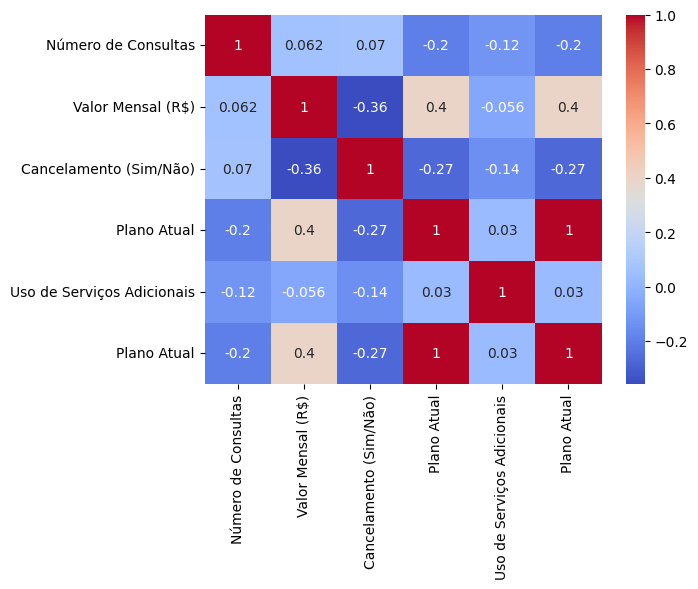

In [37]:


sns.heatmap(resultado.corr(), annot=True, cmap='coolwarm')

plt.show()


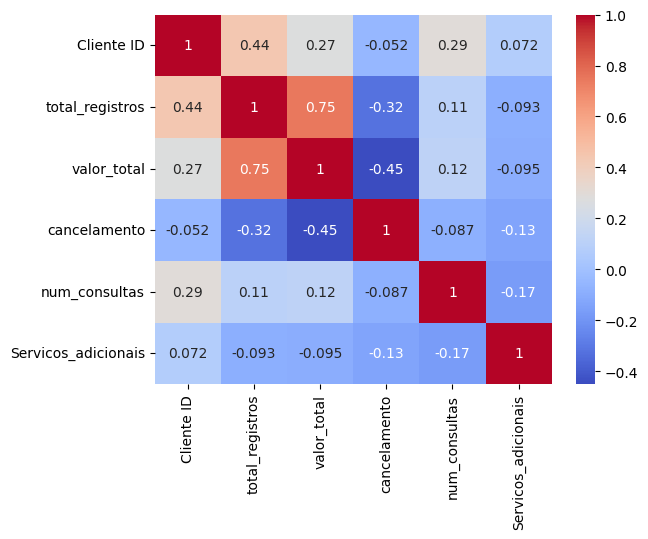

In [38]:


sns.heatmap(resultado2.corr(), annot=True, cmap='coolwarm')

plt.show()